In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score
import seaborn as sns

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
X = df[["CreditScore", "Age", "Balance", "EstimatedSalary", "Gender", "IsActiveMember","HasCrCard","NumOfProducts","Geography"]]
X.loc[:, 'Gender'] = X["Gender"].map({'Male': 0, 'Female': 1})
X.loc[:, "Geography"] = le.fit_transform(X["Geography"])
Y = df[["Exited"]]

In [ ]:
X.head(10)

,CreditScore,Age,Balance,EstimatedSalary,Gender,IsActiveMember,HasCrCard,NumOfProducts,Geography
0,619,42,0.00,101348.88,1,1,1,1,0
1,608,41,83807.86,112542.58,1,1,0,1,2
2,502,42,159660.80,113931.57,1,0,1,3,0
3,699,39,0.00,93826.63,1,0,0,2,0
4,850,43,125510.82,79084.10,1,1,1,1,2
5,645,44,113755.78,149756.71,0,0,1,2,2
6,822,50,0.00,10062.80,0,1,1,2,0
7,376,29,115046.74,119346.88,1,0,1,4,1
8,501,44,142051.07,74940.50,0,1,0,2,0
9,684,27,134603.88,71725.73,0,1,1,1,0


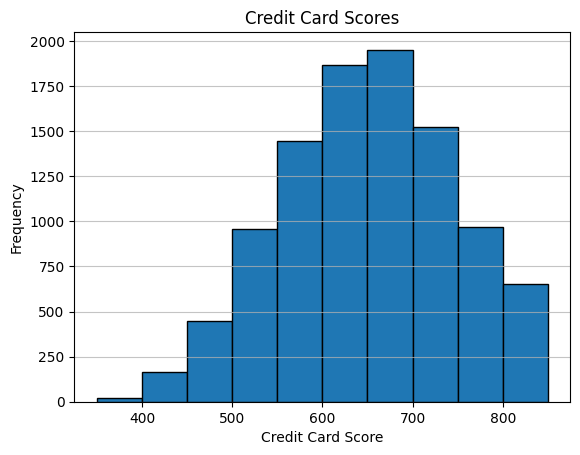

In [ ]:
credit_scores = df['CreditScore']

plt.hist(credit_scores, bins=10,edgecolor='black')
plt.title('Credit Card Scores')
plt.xlabel('Credit Card Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

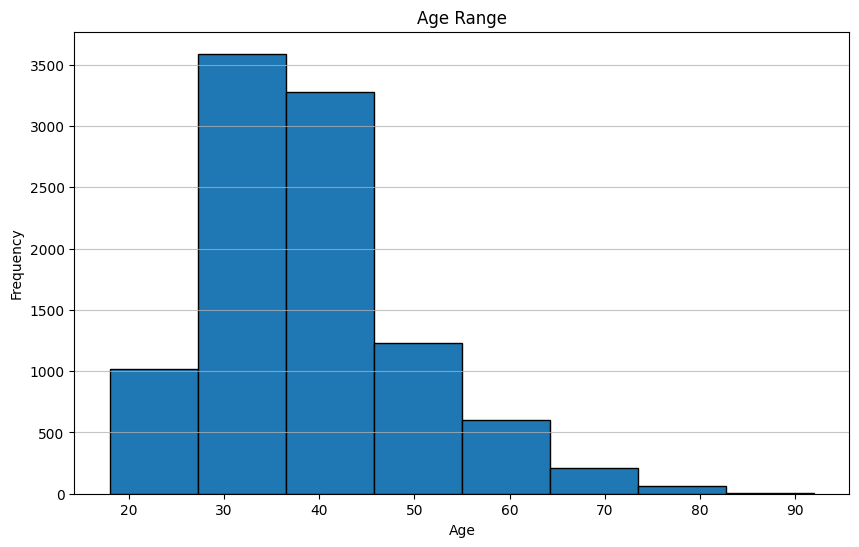

In [ ]:
Age_range = df['Age']
plt.figure(figsize=(10, 6))
plt.hist(Age_range, bins=8,edgecolor='black')
plt.title('Age Range')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

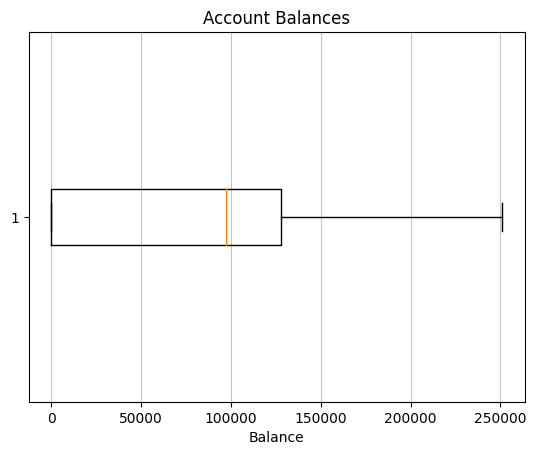

In [ ]:
plt.boxplot(df['Balance'], vert=False)
plt.title('Account Balances')
plt.xlabel('Balance')
plt.grid(axis='x', alpha=0.75)
plt.show()

<ipython-input-78-6dc18086d518>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='EstimatedSalary', data=df, palette='Set2', estimator=sum)


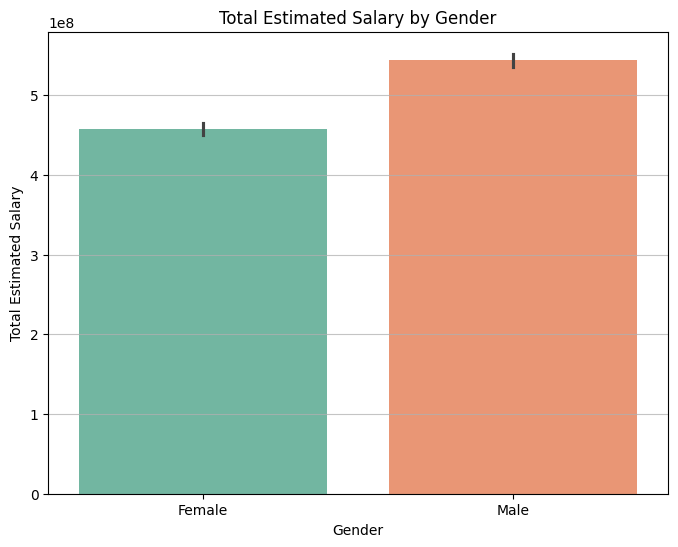

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='EstimatedSalary', data=df, palette='Set2', estimator=sum)
plt.title('Total Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Estimated Salary')
plt.grid(axis='y', alpha=0.75)
plt.show()

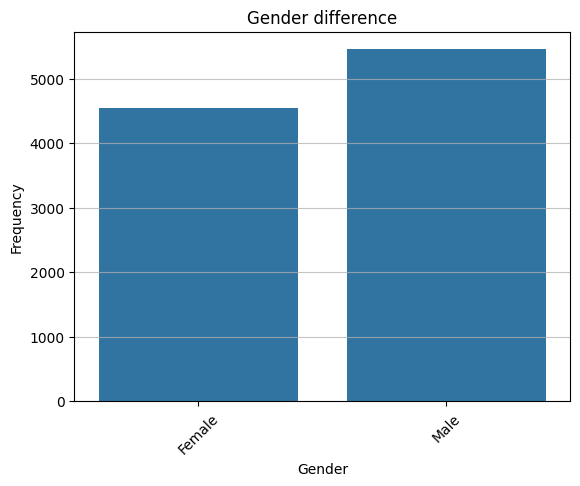

In [ ]:
gender_count = df['Gender']

sns.countplot(x='Gender', data=df)
plt.title("Gender difference")
plt.xlabel("Gender")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

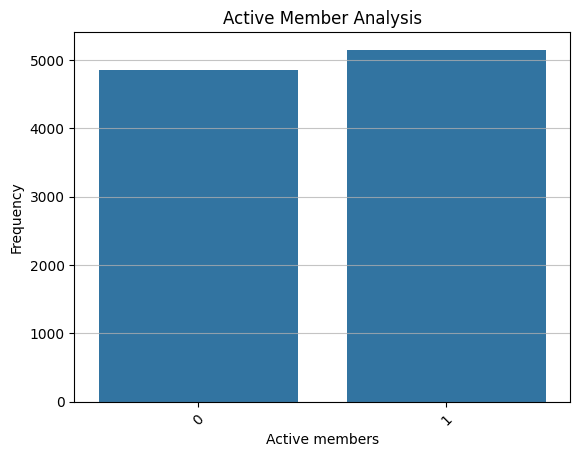

In [ ]:
Active = df['IsActiveMember']

sns.countplot(x='IsActiveMember', data=df)
plt.title("Active Member Analysis")
plt.xlabel("Active members")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

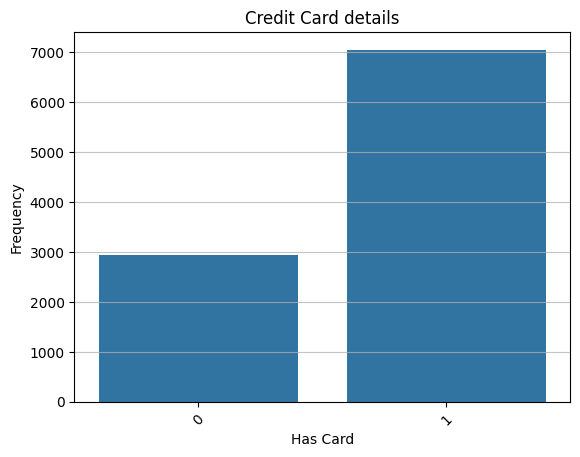

In [ ]:
crcard = df['HasCrCard']

sns.countplot(x='HasCrCard', data=df)
plt.title("Credit Card details")
plt.xlabel("Has Card")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

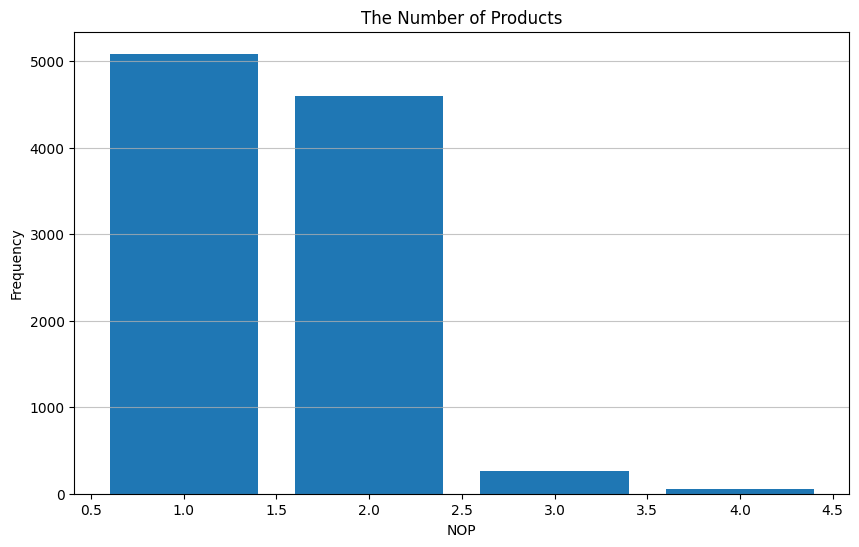

In [ ]:
No_Products = df['NumOfProducts'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(No_Products.index, No_Products.values)
plt.title('The Number of Products')
plt.xlabel('NOP')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

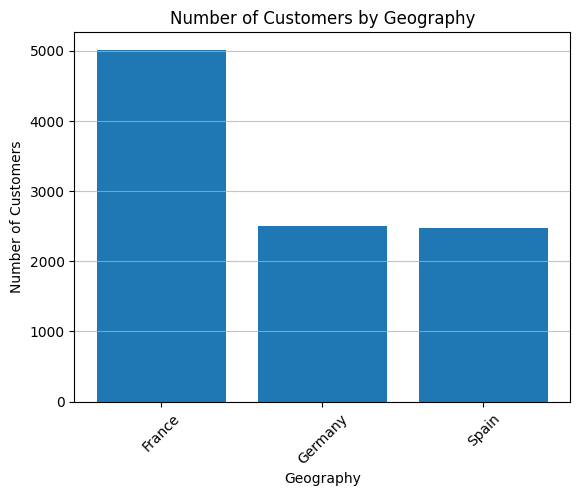

In [ ]:
geography_counts = df['Geography'].value_counts()

# Plotting the bar chart
plt.bar(geography_counts.index, geography_counts.values)
plt.title('Number of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
Y.head(10)

,Exited
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [ ]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


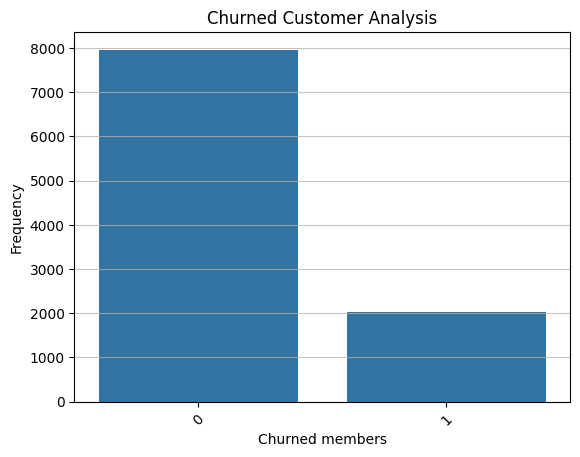

In [ ]:
Active = df['Exited']

sns.countplot(x='Exited', data=df)
plt.title("Churned Customer Analysis")
plt.xlabel("Churned members")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(len(X_train))

8000


In [ ]:
print(len(Y_train))

8000


In [ ]:
print(len(X_test))

2000


In [ ]:
print(len(Y_test))

2000


In [ ]:
X_train

,CreditScore,Age,Balance,EstimatedSalary,Gender,IsActiveMember,HasCrCard,NumOfProducts,Geography
5291,659,32,155584.21,153662.88,1,1,0,1,0
8771,681,31,97338.19,48226.76,0,0,0,2,1
35,475,45,134264.04,27822.99,1,0,1,1,0
1255,624,46,0.00,62825.03,0,1,1,2,2
3266,537,30,103138.17,96555.42,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...
6400,676,30,0.00,179066.58,1,0,0,2,2
9160,778,24,0.00,162809.20,0,1,1,2,0
9859,678,55,129646.91,184125.10,0,1,1,1,1
1688,601,41,0.00,160607.06,1,1,0,2,0


In [ ]:
model = LogisticRegression(penalty="l1", solver="liblinear")
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8175
